In [1]:
import pandas as pd
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv("dataset.csv", encoding='utf-8')
data.head()

,color,size,target
0,0.779427,0.257305,1.0
1,0.777005,0.015915,1.0
2,0.977092,0.304210,1.0
3,0.043032,0.140899,0.0
4,0.760433,0.193123,1.0


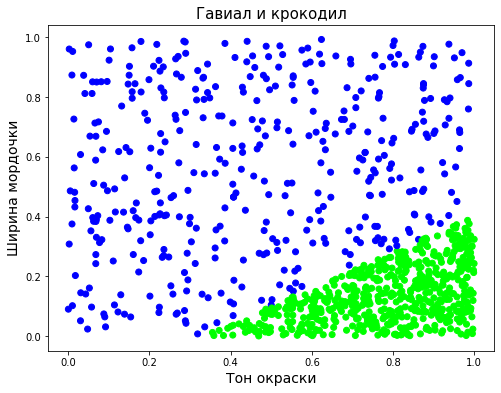

In [3]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['target'], cmap='brg')
plt.title('Гавиал и крокодил', fontsize=15)
plt.xlabel('Тон окраски', fontsize=14)
plt.ylabel('Ширина мордочки', fontsize=14)
plt.show();

In [4]:
X = data.iloc[:,:2].values[:]  
X[:5] 

array([[0.77942731, 0.25730527],
       [0.77700501, 0.0159154 ],
       [0.97709225, 0.30420962],
       [0.0430319 , 0.1408993 ],
       [0.76043337, 0.19312296]])

In [5]:
Y = data['target'].values.reshape((-1, 1))[:] 
Y[:5]

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.]])

In [12]:
import torch
from torch.nn import *

In [13]:
num_features = X.shape[1]

neuron = nn.Sequential( #создание нейрона
    Linear(num_features, out_features=1),
    Sigmoid()
)
neuron

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [28]:
#случайные начальные веса

neuron(torch.autograd.Variable(torch.FloatTensor([1, 1])))

tensor([0.0033], grad_fn=<SigmoidBackward>)

In [27]:
prob_pred = neuron(torch.autograd.Variable(torch.FloatTensor(X)))
prob_pred
y_pred = prob_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)
y_pred
print("size = ", y_pred.size)

size =  1002


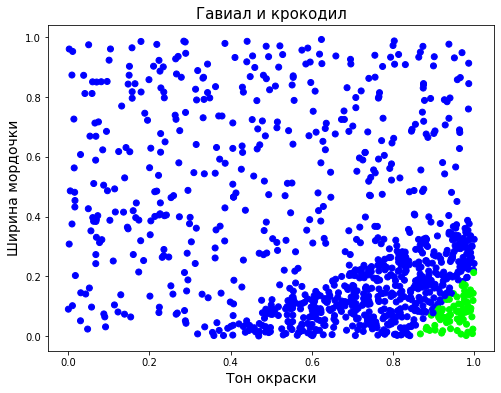

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='brg')
plt.title('Гавиал и крокодил', fontsize=15)
plt.xlabel('Тон окраски', fontsize=14)
plt.ylabel('Ширина мордочки', fontsize=14)
plt.show()

Y here is tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]])
y_pred tensor([[0.7564],
        [0.9797],
        [0.8892],
        ...,
        [0.8770],
        [0.0171],
        [0.0171]], grad_fn=<SigmoidBackward>)
Y tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [0.],
        [0.]])


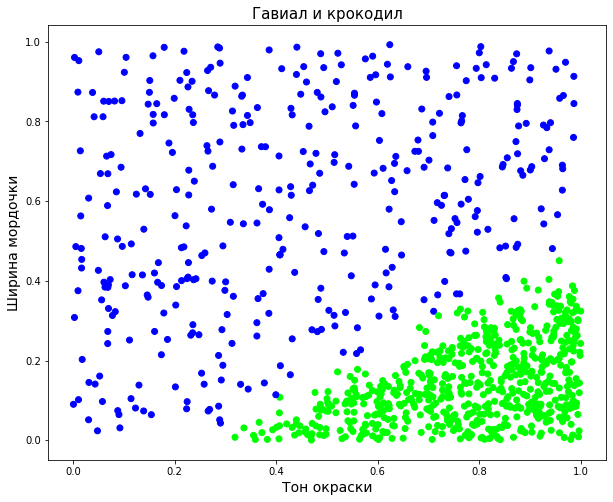

In [23]:
X = torch.autograd.Variable(torch.FloatTensor(X))
Y = torch.autograd.Variable(torch.FloatTensor(Y))
print("Y here is", Y)
# функция потерь
loss_func = torch.nn.MSELoss(size_average=False)

# скорость обучения (шаг метода оптимизации) 
learning_rate = 1e-3

# метод оптимизации (SGD - стохастический градиентный спуск)
optimizer = torch.optim.SGD(neuron.parameters(), lr=learning_rate)

# количество итераций
num_epochs = 500

# обучение
for i in range(num_epochs):
    y_pred = neuron(X)
    print("y_pred", y_pred)
    print("Y", Y)
    break
    loss = loss_func(y_pred, Y)
    print(f'Iter: {i} -> Loss: {loss.data}')

    # обнуление градиентов, иначе будут копиться градинты с предыдущей итерации
    optimizer.zero_grad()

    # вычисление градиентов
    loss.backward()

    # обновление весов
    optimizer.step()

prob_pred = neuron(X)
y_pred = prob_pred > 0.5
y_pred = y_pred.data.numpy().reshape(-1)

plt.figure(figsize=(10, 8))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_pred, cmap='brg')
plt.title('Гавиал и крокодил', fontsize=15)
plt.xlabel('Тон окраски', fontsize=14)
plt.ylabel('Ширина мордочки', fontsize=14)
plt.show()